In [3]:
# The necessary packages are imported.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
# The data set is loaded into the dataframe 'df'.

df = pd.read_csv('/kaggle/input/breast-cancer/Breast cancer.csv')


In [6]:
df.head() # Displays the first five rows of 'df'

,id,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.shape 

(699, 11)

In [8]:
df.drop('id',axis = 1,inplace = True) # The 'id' column is dropped.

In [9]:
df.shape

(699, 10)

In [10]:
col_names = ['clump thickness','uniformity of cell size','uniformity of cell shape','marginal adhesion','single epithelial cell size','bare nuclei','bland chromatin','normal nucleoli','mitosis','class'] # 'col_names' is a list of column names of 'Breast cancer.csv'

In [11]:
# Prints count of each column
for x in col_names: 
 print(df[x].count())

699
699
699
699
699
699
699
699
699
699


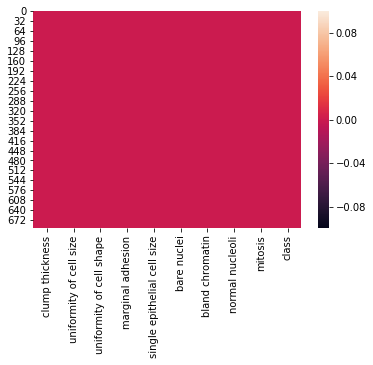

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bland chromatin,normal nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
# Prints total number of unique elements in each column
for x in col_names: 
 print(df[x].nunique())
 

10
10
10
10
10
11
10
10
9
2


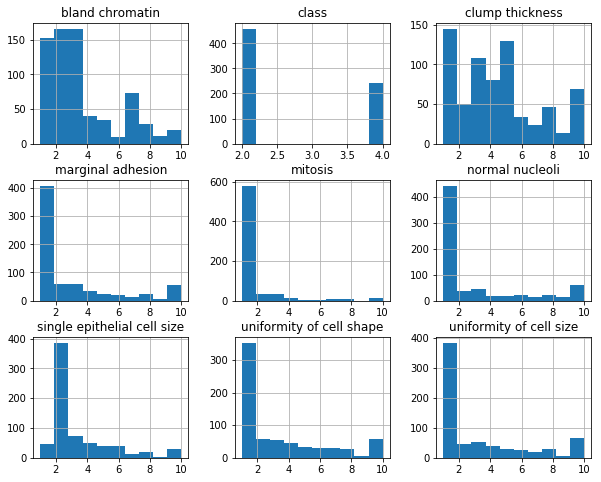

In [16]:
df.hist(figsize = (10,8))
plt.show()

<Figure size 720x720 with 0 Axes>

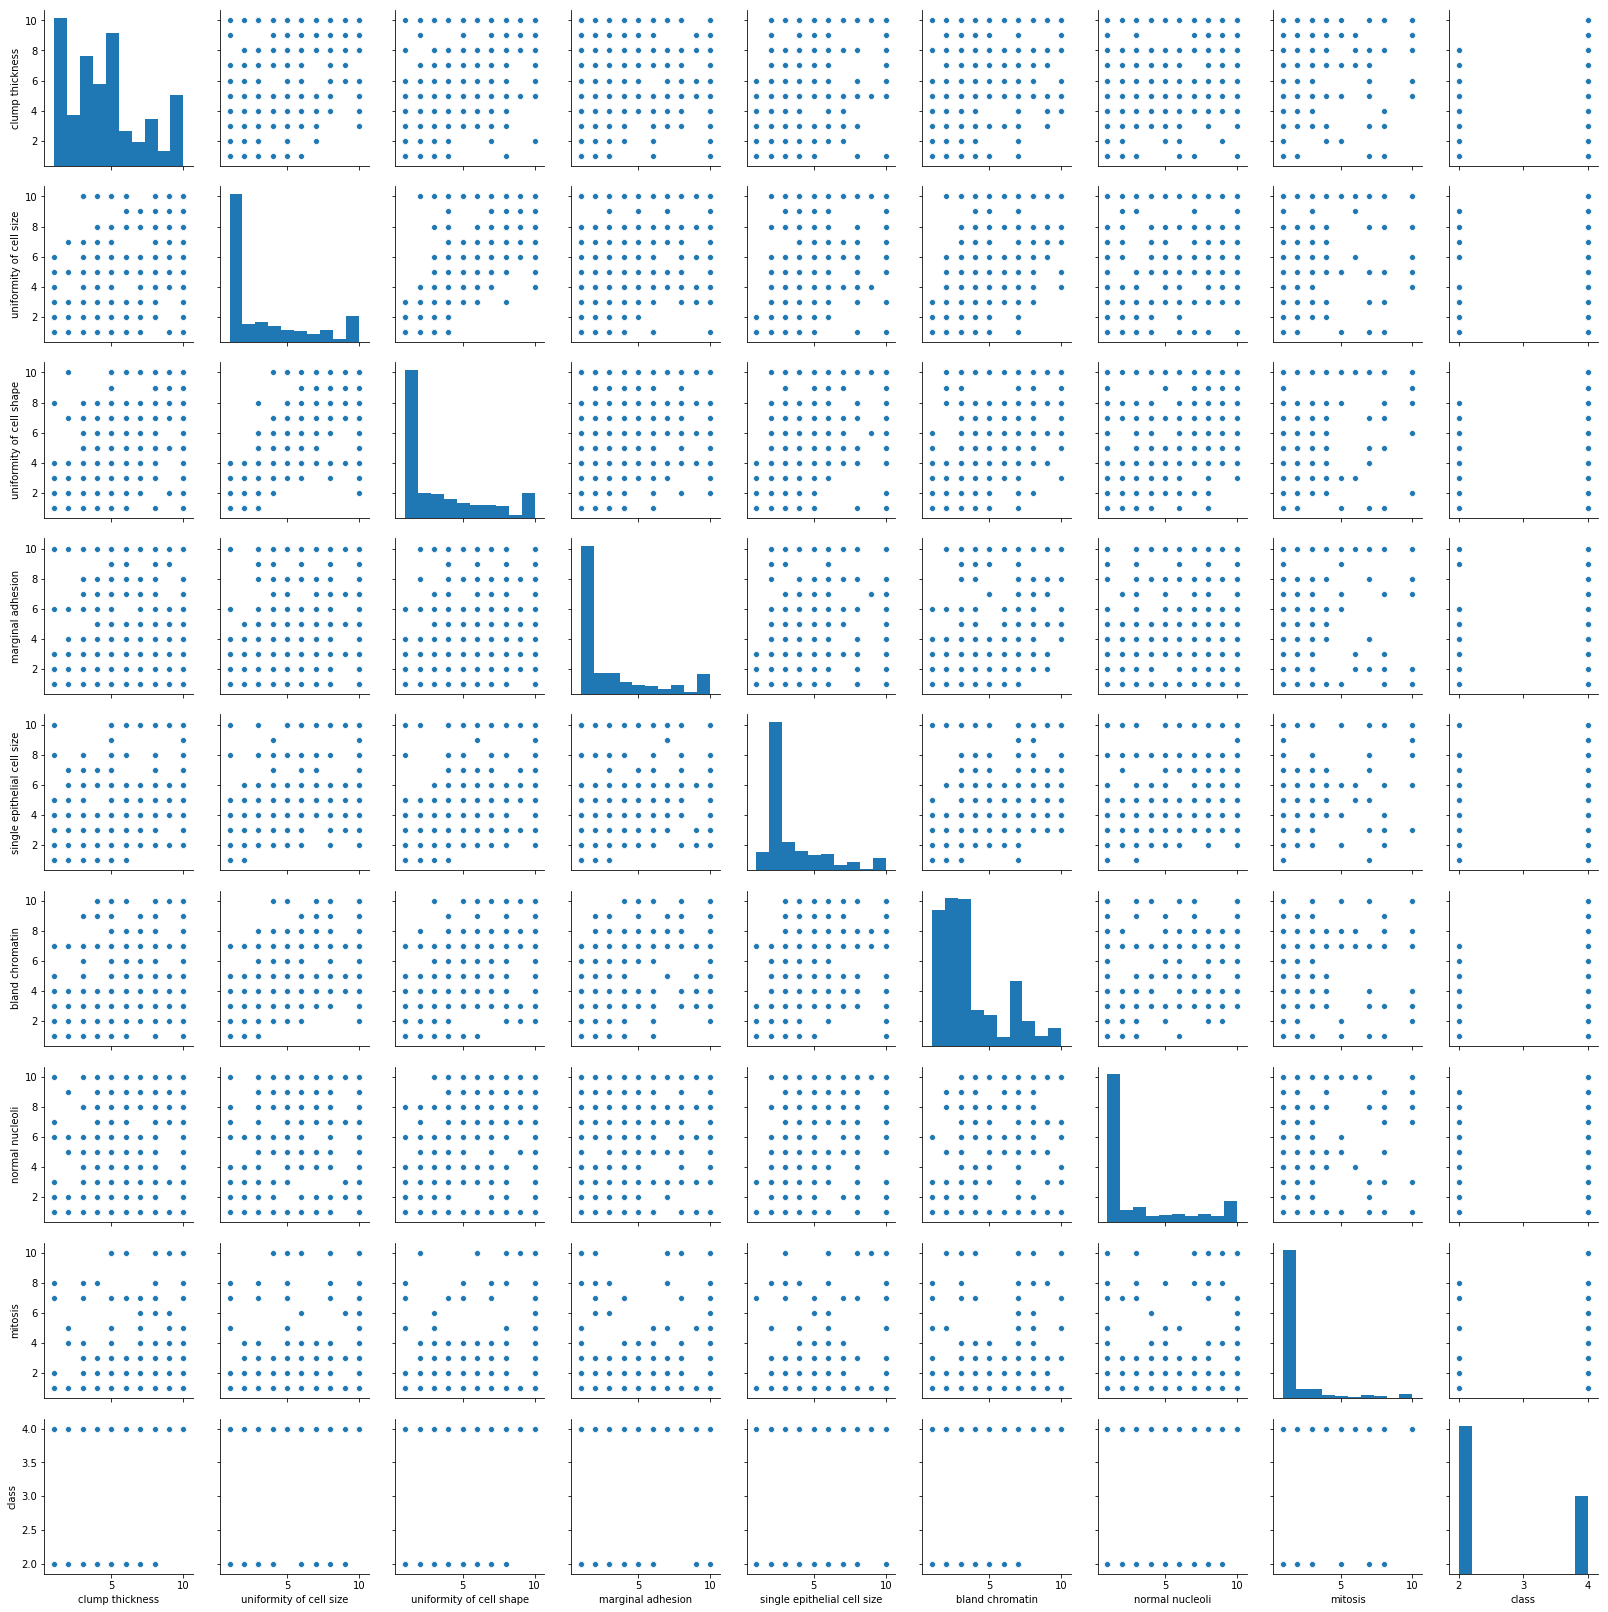

In [17]:
plt.figure(figsize = (10,10))
sns.pairplot(df)

In [19]:
df.drop('bare nuclei',axis = 1,inplace = True)

In [20]:
df.shape

(699, 9)

In [21]:
X = df.drop('class',1) # X is input
y = df['class'] # y is output
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2) # Spitting into train and test set.

In [23]:
validation_type = model_selection.KFold(n_splits = 10) # K-Fold cross validation technique is used.
cross_validation_result1 = model_selection.cross_val_score(SVC(),X_train,y_train,cv = validation_type,scoring = 'accuracy') # Cross validation score of SVC model.
cross_validation_result2 = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors = 5),X_train,y_train,cv = validation_type,scoring = 'accuracy') # Cross validation score of KNN model.
print(cross_validation_result1.mean(),cross_validation_result2.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.9678571428571429 0.9607142857142857


In [24]:
a = SVC().fit(X_train,y_train) # Fitting the model.
predictions  = a.predict(X_test) # Test set is predicted.
print(accuracy_score(y_test,predictions)) # Accuracy score is calculated.
print(' ')
print(classification_report(y_test,predictions)) # Classification report is generated.

0.9285714285714286
 
              precision    recall  f1-score   support

           2       1.00      0.89      0.94        91
           4       0.83      1.00      0.91        49

    accuracy                           0.93       140
   macro avg       0.92      0.95      0.92       140
weighted avg       0.94      0.93      0.93       140



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
b = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train) # Fitting the model.
predictions  = b.predict(X_test) # Test set is predicted.
print(accuracy_score(y_test,predictions)) # Accuracy score is calculated.
print(classification_report(y_test,predictions)) # Classification report is generated.

0.9285714285714286
              precision    recall  f1-score   support

           2       0.97      0.92      0.94        91
           4       0.87      0.94      0.90        49

    accuracy                           0.93       140
   macro avg       0.92      0.93      0.92       140
weighted avg       0.93      0.93      0.93       140



In [34]:
# Prediction using trained model
prediction = a.predict(np.array([[1,2,2,5,3,6,4,8]])) 
print(prediction)

[4]
